In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
prod_summ = pd.read_csv('../Files/processed-data/prod_summ.csv',parse_dates = True)
well_header = pd.read_csv('../Files/processed-data/well_header.csv',parse_dates = True)

C:\Users\Anirudh Narayanan\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
earthquakes = pd.read_csv('../Files/processed-data/completeEarthquakeFreq.csv', index_col=1, parse_dates=True)
earthquakes['Year'] = earthquakes.index.year


earthquakes_past20 = earthquakes['2000':'2015']
earthquakes_past20_year = earthquakes_past20.groupby(['Year']).size()

In [4]:
merged_data = pd.merge(well_header[['API','WELLID','COUNTY','CUMULATIVEGASPRODUCTION',\
                                    'CUMULATIVEOILPRODUCTION','CUMULATIVEWATERPRODUCTION','WELLBOREPROFILE',\
                                   'SPUDDATE','FIRSTPRODDATE','PLUGDATE']],
                       prod_summ[['API','WELLID','CUMULATIVEOIL','CUMULATIVEGAS','CUMULATIVEWATER','TOTALPRODUCINGDAYS']]
                      )

merged_data['SPUDYEAR'] = pd.to_datetime(merged_data.SPUDDATE).dt.year

In [5]:
merged_data['WELLTYPE'] = np.where(merged_data.WELLBOREPROFILE == 'Unknown', 'VERTICAL',merged_data.WELLBOREPROFILE)
merged_data['OILPRODPERDAY'] = merged_data['CUMULATIVEOIL']/merged_data['TOTALPRODUCINGDAYS']
merged_data['WATERPRODPERDAY'] = merged_data['CUMULATIVEWATER']/merged_data['TOTALPRODUCINGDAYS']

### Plotting oil production per day over time

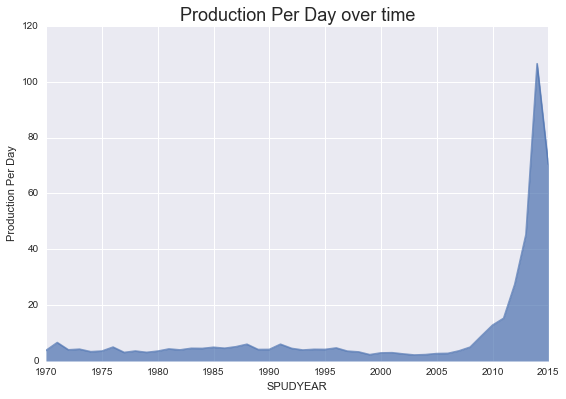

In [45]:
merged_data[merged_data.SPUDYEAR >= 1970].groupby('SPUDYEAR').mean().OILPRODPERDAY.\
plot(kind = 'area', alpha = 0.7,figsize = (9,6))

plt.ylabel('Production Per Day')
plt.title('Production Per Day over time',fontdict={'fontsize':18})
plt.savefig('../Plots/Production_per_day.png')

### Comparison between well types

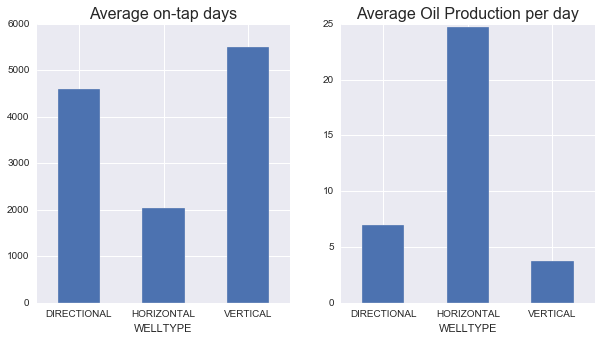

In [63]:
%matplotlib inline

plt.figure(3)
## Comparing ontap performance of horizontal and vertical wells
plt.subplot(121)
merged_data.groupby('WELLTYPE')['TOTALPRODUCINGDAYS'].mean().plot(kind = 'bar',figsize = (10,5))
plt.title('Average on-tap days',fontdict={'fontsize':16})
plt.xticks(rotation=0)
plt.subplot(122)
merged_data.groupby('WELLTYPE')['OILPRODPERDAY'].mean().plot(kind = 'bar',figsize = (10,5))
plt.title('Average Oil Production per day',fontdict={'fontsize':16})
plt.xticks(rotation=0)
plt.savefig('../Plots/well_type_comps.png')

### Horizontal well counts versus earthquake acitivity

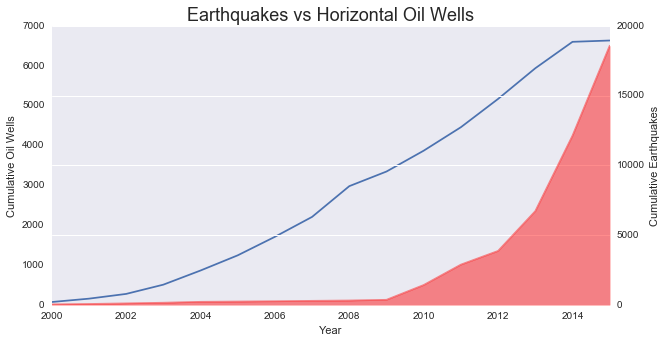

In [43]:
welltype_counts = pd.pivot_table(merged_data,values = ['API'], index = ['SPUDYEAR'], columns = ['WELLTYPE'], aggfunc = 'count')
welltype_counts.columns = ['DIRECTIONAL','HORIZONTAL','VERTICAL']


welltype_counts['HORIZONTAL'][(welltype_counts.index >=2000) & (welltype_counts.index <=2015) ].cumsum().plot(figsize = (10,5))
plt.ylabel('Cumulative Oil Wells')
earthquakes_past20_year.cumsum().plot(kind = 'area', alpha = 0.45,secondary_y=True, color = 'red')
plt.title('Earthquakes vs Horizontal Oil Wells',fontdict={'fontsize':18})
plt.ylabel('Cumulative Earthquakes')
plt.savefig('../Plots/eq_vs_oil_wells.png')